In [9]:
s = 40

In [10]:
import re
import numpy as np
from scipy.signal import find_peaks
from scipy.fft import fft
import matplotlib.pyplot as plt

In [11]:
f = open('data', 'r')
data = f.read()
f.close()
values = []
for row in data.split('\n'):
    row = re.split('[ :]' , row)
    if(len(row) == 5):
        values.append(row[4])

In [12]:
s = s * 100
y = values
y = y[s:s+6000]
N = len(y)
T = 0.01
x = np.linspace(0.0, N*T, N)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
yfm = 2.0/N * np.abs(yf[0:N//2])
peaks, _ = find_peaks(yfm, prominence=10)

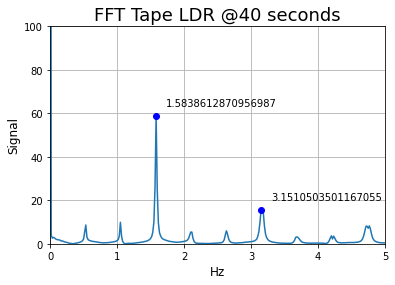

In [14]:
fig = plt.figure()
plt.plot(xf, yfm)
plt.plot(xf[peaks], yfm[peaks], "ob")
for peak in peaks:
    plt.annotate(xf[peak], (xf[peak], yfm[peak]), textcoords="offset points", xytext=(10,10))
plt.grid()
plt.title("FFT Tape LDR @%d seconds" % int(s / 100),fontsize=18)
plt.xlabel("Hz",fontsize=12)
plt.ylabel("Signal",fontsize=12)

plt.xlim(0,5)
plt.ylim(0,100)
plt.show()